<a href="https://colab.research.google.com/github/alexoh2bd/ds_playground/blob/main/MLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:

words = open('sample_data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
# context length
block_size = 3
X, Y = [],[]
for w in words:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:

# embedding integers directly vs one hot F.one_hot(torch.tensor(5), num_classes=27).float() @ C
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C,W1,b1,W2,b2]

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [ ]:
# lri =[]
# lossi = []
for i in range(10000):
  # minibatch
  ix=torch.randint(0, X.shape[0], (32,))

  # forward Pass
  emb = C[X[ix]] # (32,3,2)
  h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100) layers of tanh activations
  logits = h @ W2 + b2 # (32,27) softmax function
  loss = F.cross_entropy(logits, Y[ix]) # numerically better behaved/ math shortcuts

  # Backward Pass
  for p in parameters:
    p.grad=None
  loss.backward()

  #Update
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # track
  # lri.append(lre[i])
  # lossi.append(loss.item())
print(loss.item())


2.6978464126586914


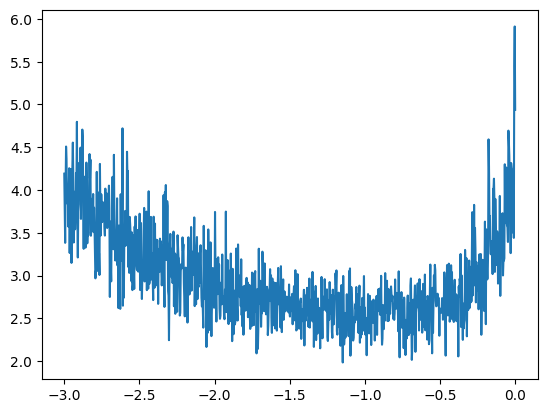

In [ ]:
# Determine good learning
plt.plot(lri, lossi)